In [1]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

import datetime
import warnings
from pandas.plotting import scatter_matrix

import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

<h1>1. import all the method and library that i need for linear regression, data analysis </h1>

<h2>define mean_absolute_percentage_error function for linear regression check (later)</h2>

In [2]:
# Source: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

<h1>2. Data prepare</h1>
<h2>testing file and training file</h2>

In [278]:
testing = pd.read_csv('data/testing.csv',  skipinitialspace=True)
testing

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.89,...,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.89,...,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.790000,44.900000,18.89,...,734.366667,91.333333,5.666667,40.000000,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,19.00,...,734.433333,91.166667,5.833333,40.000000,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.100000,48.466667,19.00,...,734.850000,89.500000,6.000000,40.000000,4.350000,24.884962,24.884962,70200,Weekday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,2016-05-27 13:50:00,230,0,25.500000,47.133333,26.600000,41.000000,28.200000,41.796667,24.60,...,755.850000,59.166667,1.833333,22.333333,13.500000,5.773431,5.773431,49800,Weekday,Friday
4928,2016-05-27 14:30:00,60,0,25.566667,46.633333,26.370000,41.378000,28.566667,41.156667,24.70,...,755.800000,59.000000,2.000000,21.500000,13.450000,8.991420,8.991420,52200,Weekday,Friday
4929,2016-05-27 15:50:00,100,0,25.500000,45.633333,26.080000,41.196000,28.133333,40.260000,24.70,...,755.550000,55.666667,2.000000,22.666667,13.216667,47.981309,47.981309,57000,Weekday,Friday
4930,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,...,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,62400,Weekday,Friday


In [279]:
training = pd.read_csv('data/training.csv',  skipinitialspace=True)
training

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,734.0,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,64200,Weekday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,...,755.2,55.000000,3.000000,22.000000,13.400000,18.248201,18.248201,61200,Weekday,Friday
14799,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,...,755.2,55.333333,3.166667,22.833333,13.366667,16.966162,16.966162,61800,Weekday,Friday
14800,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,63000,Weekday,Friday
14801,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,64200,Weekday,Friday


<h2>check the size of training, testing file</h2>

In [5]:
training.shape, testing.shape

((14803, 32), (4932, 32))

<h2>check if they have null value</h2>

In [6]:
training.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

In [7]:
testing.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

<h2>there are no null value in both testing, training dataframe</h2>

<h1>make total data file(which include testing, training file) for data analysis</h1>

In [8]:
energy_data=pd.concat([training,testing],ignore_index=True)
energy_data.shape


(19735, 32)

In [280]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,63000,Weekday,Monday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday


<h1>3. plots for analysis</h1>

<h2> sort energy_data dataframe by date</h2>

In [281]:
energy_data=energy_data.sort_values(by=['date'], axis=0)
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,63000,Weekday,Monday
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,Weekday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,62400,Weekday,Friday
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,63000,Weekday,Friday
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,63600,Weekday,Friday
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,64200,Weekday,Friday


In [15]:
energy_data.reset_index(inplace=True)
energy_data.drop('index',axis='columns', inplace=True)
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,63000,Weekday,Monday
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,Weekday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,62400,Weekday,Friday
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,63000,Weekday,Friday
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,63600,Weekday,Friday
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,64200,Weekday,Friday


<h2>analyze data with the different types of plots</h2>
<h2>Fig 1. (A) Appliances energy consumption measurement for the whole period</h2>

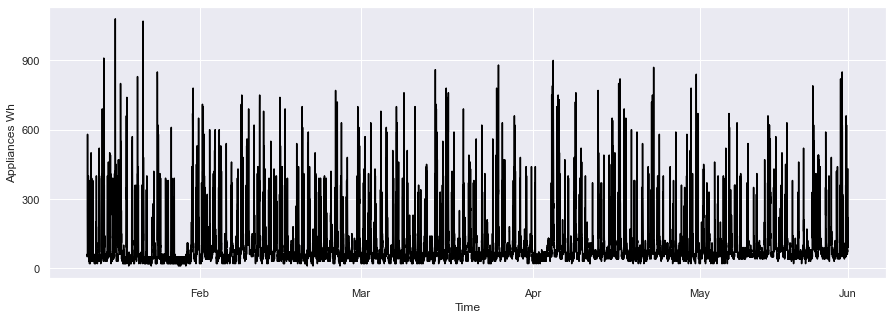

In [47]:

en=energy_data.Appliances.plot(figsize=(15,5),color="Black")  
en.set_ylabel("Appliances Wh")
en.set_xlabel("Time")
en.set_xticks([2922,7098,11562,15882,19734])
en.set_xticklabels(['Feb','Mar','Apr','May','Jun'])
en.set_yticks([0,300,600,900])



<h2>Appliances is highest in January</h2>

In [16]:
energy_data.head(20)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,63000,Weekday,Monday
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,Weekday,Monday
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,64200,Weekday,Monday
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,64800,Weekday,Monday
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,65400,Weekday,Monday
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,66000,Weekday,Monday
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,66600,Weekday,Monday


<h2>new dataframe for first week of data</h2>

In [17]:
en_11_19=energy_data[pd.DatetimeIndex(energy_data['date']).month==1]
en_11_19=en_11_19[pd.DatetimeIndex(en_11_19['date']).day>=11 ]
en_11_19=en_11_19[pd.DatetimeIndex(en_11_19['date']).day<19 ] 

In [282]:
en_11_19

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.5,92.000000,7.000000,63.000000,5.30,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.6,92.000000,6.666667,59.166667,5.20,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.7,92.000000,6.333333,55.333333,5.10,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,733.8,92.000000,6.000000,51.500000,5.00,45.410389,45.410389,63000,Weekday,Monday
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.9,92.000000,5.666667,47.666667,4.90,10.084097,10.084097,63600,Weekday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2016-01-18 23:10:00,50,10,20.600000,38.663333,19.533333,38.966667,20.290000,41.026667,20.600000,...,756.6,87.833333,1.000000,64.166667,-6.55,20.385743,20.385743,83400,Weekday,Monday
1046,2016-01-18 23:20:00,50,10,20.600000,38.790000,19.463333,39.030000,20.230000,40.826667,20.566667,...,756.6,87.666667,1.000000,64.333333,-6.50,29.119402,29.119402,84000,Weekday,Monday
1047,2016-01-18 23:30:00,40,20,20.533333,38.863333,19.390000,39.090000,20.200000,40.700000,20.500000,...,756.6,87.500000,1.000000,64.500000,-6.45,15.446453,15.446453,84600,Weekday,Monday
1048,2016-01-18 23:40:00,30,10,20.500000,38.933333,19.356667,39.156667,20.133333,40.626667,20.390000,...,756.6,87.333333,1.000000,64.666667,-6.40,24.048282,24.048282,85200,Weekday,Monday


<h2>en_11_19 is the dataframe which only have data from 11 to 18</h2>

<h2>Fig 1. (B) A closer look at the first week of data.</h2>

[Text(186, 0, 'Jan 13'),
 Text(474, 0, 'Jan 15'),
 Text(764, 0, 'Jan 17'),
 Text(1049, 0, 'Jan 19')]

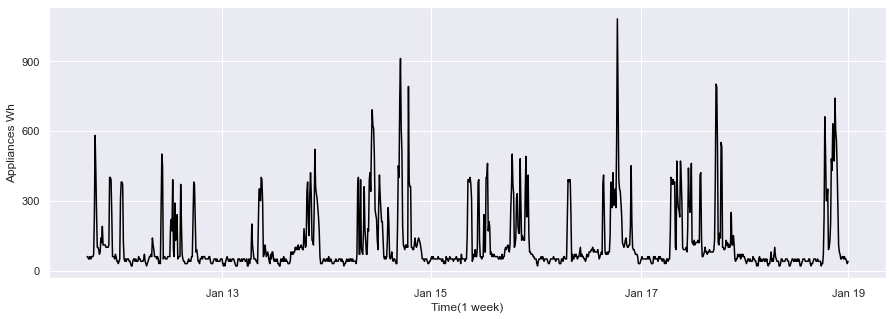

In [19]:

en_j=en_11_19.Appliances.plot(figsize=(15,5),color="Black") 
en_j.set_ylabel("Appliances Wh")
en_j.set_xlabel("Time(1 week)")
en_j.set_yticks([0,300,600,900])
en_j.set_xticks([186,474,764,1049])
en_j.set_xticklabels(['Jan 13','Jan 15','Jan 17','Jan 19'])


<h2>Appliances is highest at Jan 17</h2>

<h2>Fig. 2. Appliances energy consumption distribution. Top: histogram, bottom: boxplot. The histogram shows the frequency of energy consumption in the interval (bar width), and the boxplot shows the location of the median with the black line.</h2>>

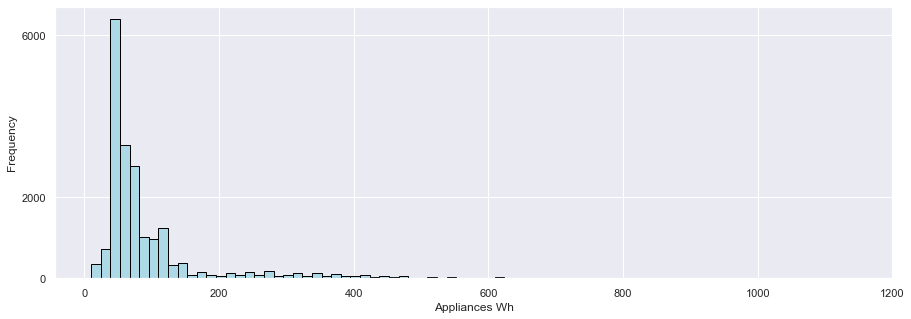

In [32]:
en_hi=energy_data.Appliances.hist(bins=75,edgecolor='black',figsize=(15,5),color="LightBlue")
en_hi.set_ylabel("Frequency")
en_hi.set_xlabel("Appliances Wh")
en_hi.set_yticks([0,2000,6000])
en_hi.set_xticks([0,200,400,600,800,1000,1200])

<h2>Appliances data Frequency is right skewed</h2>

<h2>That means, between 0 and 200, the appliance has the highest frequency.</h2>

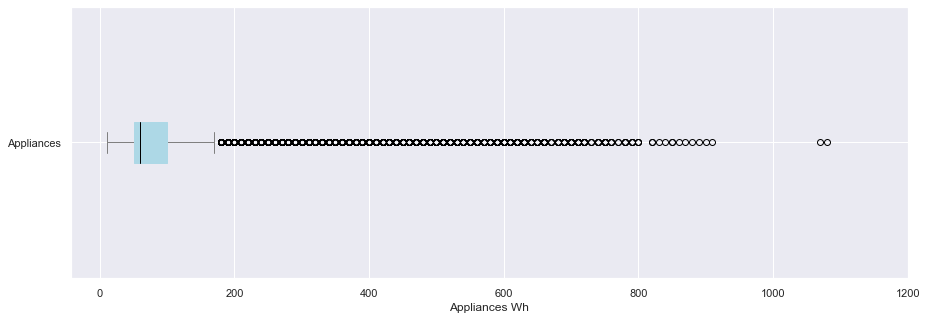

In [33]:
props = dict(boxes="LightBlue", whiskers="Gray", medians="Black", caps="Gray")
en_box=energy_data.boxplot(column='Appliances',vert=False,figsize=(15,5),color=props,patch_artist=True)
en_box.set_xlabel("Appliances Wh")
en_box.set_xticks([0,200,400,600,800,1000,1200])

<h2>Fig. 3. Pairs plot. Relationship between the energy consumption of appliances with: lights, T1, RH1, T2, RH2, T3, RH3. T1 and RH1 correspond to the kitchen conditions; T2and RH2 correspond to the living room conditions.</h2>

In [20]:
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

<h2>create new dataframe 'energy_pairgrid' for pairgrid visualisation </h2>

In [21]:
energy_pairgrid=energy_data[['Appliances', 'lights','T1', 'RH_1', 'T2', 'RH_2', 'T3','RH_3']]
energy_pairgrid

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000
...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000


<h2>create pairgrid</h2>

In [68]:
#pairGrid plots
from scipy import stats
import seaborn as sns

def disp_pearson(x,y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 70)

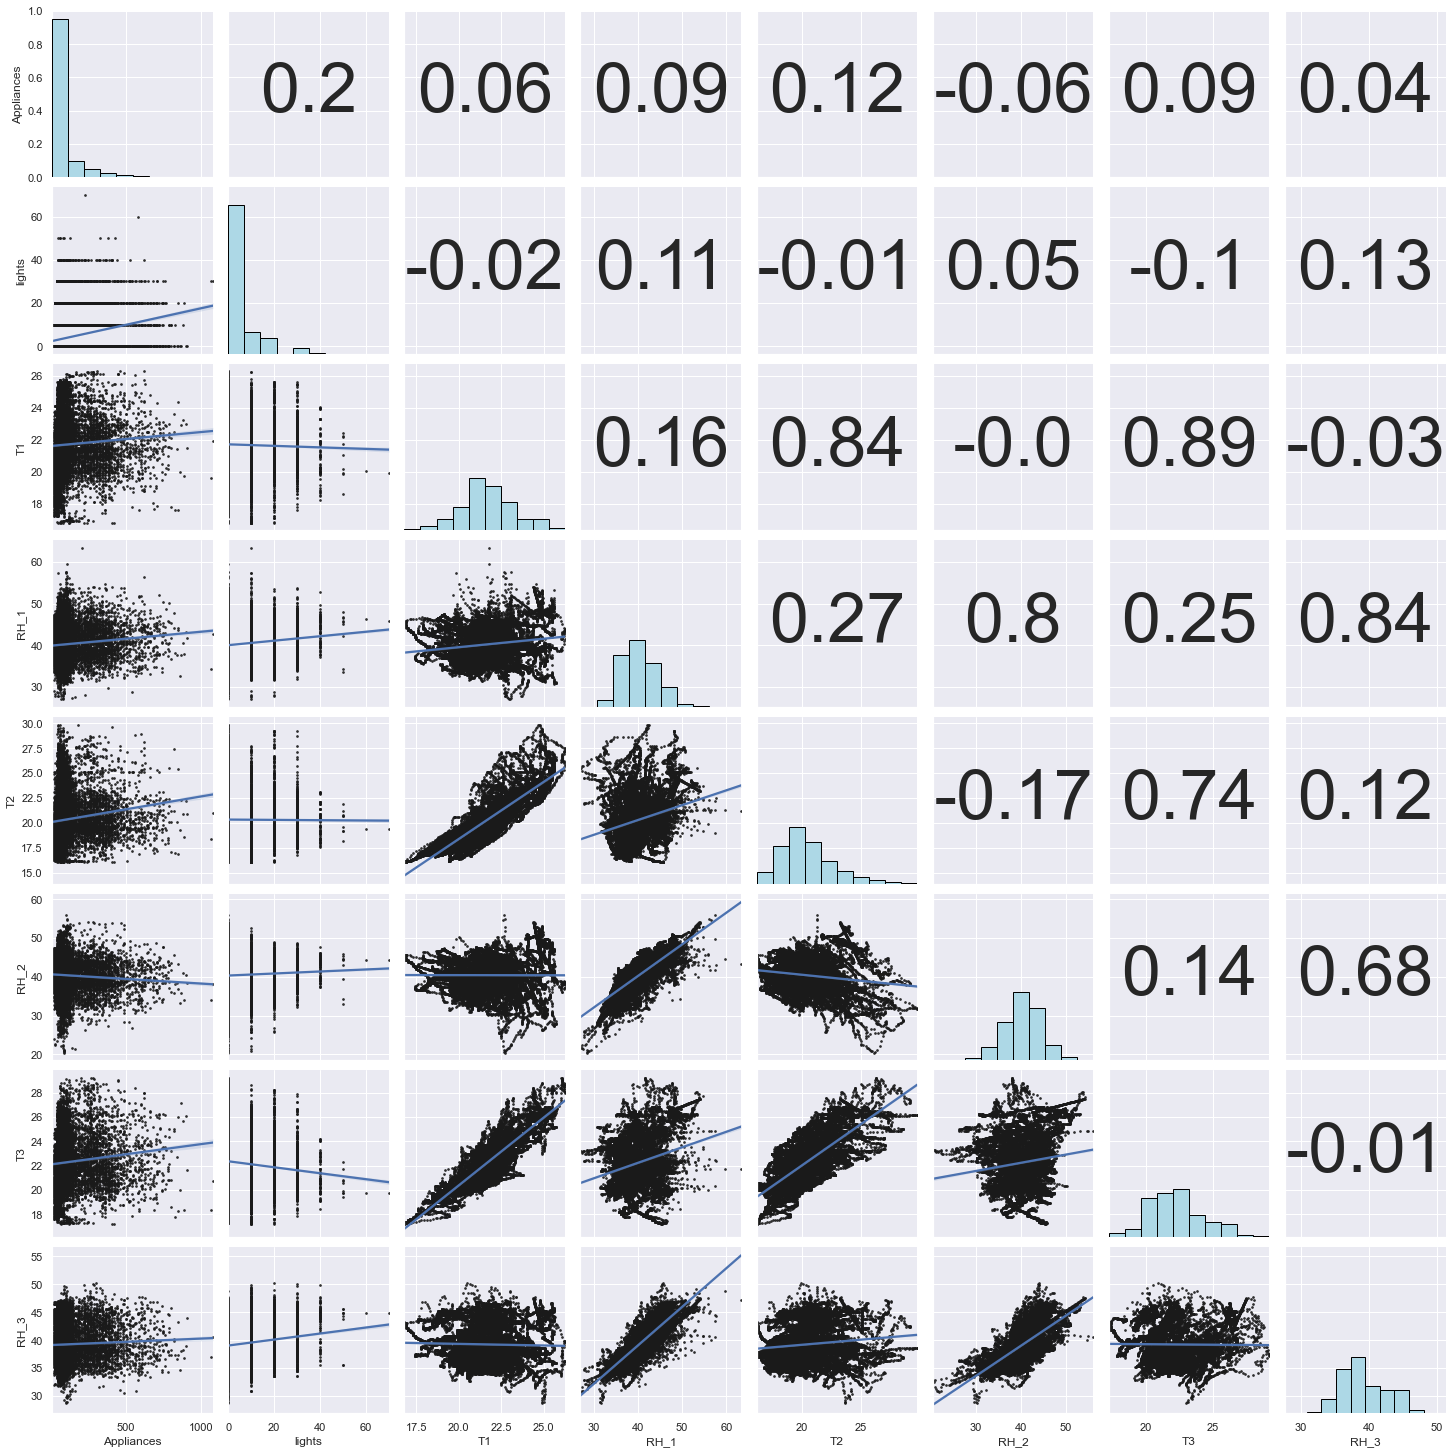

In [69]:
g=sns.PairGrid(energy_pairgrid)
g=g.map_diag(plt.hist, edgecolor="black",color="LightBlue")
g=g.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'b'})
g=g.map_upper(disp_pearson)

<h2>data analysis with pairgrid (scatter plot, correlation, histogram)</h2>

In [145]:
# 1-7, 8-14, 15-21 22-28 - February
en_4week_2=energy_data[pd.DatetimeIndex(energy_data['date']).month==2 ]
en_4week_2=en_4week_2[pd.DatetimeIndex(en_4week_2['date']).day<29 ]
en_4week_2=en_4week_2[['date','Appliances','Day_of_week']]
en_4week_2

,date,Appliances,Day_of_week
2922,2016-02-01 00:00:00,40,Monday
2923,2016-02-01 00:10:00,50,Monday
2924,2016-02-01 00:20:00,40,Monday
2925,2016-02-01 00:30:00,50,Monday
2926,2016-02-01 00:40:00,40,Monday
...,...,...,...
6949,2016-02-28 23:10:00,40,Sunday
6950,2016-02-28 23:20:00,30,Sunday
6951,2016-02-28 23:30:00,40,Sunday
6952,2016-02-28 23:40:00,60,Sunday


<h2>make first 4 weeks tables in February table for heatmap</h2>
<h2>1-7, 8-14, 15-21 , 22-28</h2>

In [146]:
# 1-7, 8-14, 15-21 22-28 - february

en_1=en_4week_2[pd.DatetimeIndex(en_4week_2['date']).day<8]
en_2=en_4week_2[pd.DatetimeIndex(en_4week_2['date']).day<15]
en_2=en_2[pd.DatetimeIndex(en_2['date']).day>7]
en_3=en_4week_2[pd.DatetimeIndex(en_4week_2['date']).day<22]
en_3=en_3[pd.DatetimeIndex(en_3['date']).day>14]
en_4=en_4week_2[pd.DatetimeIndex(en_4week_2['date']).day<29]
en_4=en_4[pd.DatetimeIndex(en_4['date']).day>21]


en_1

,date,Appliances,Day_of_week
2922,2016-02-01 00:00:00,40,Monday
2923,2016-02-01 00:10:00,50,Monday
2924,2016-02-01 00:20:00,40,Monday
2925,2016-02-01 00:30:00,50,Monday
2926,2016-02-01 00:40:00,40,Monday
...,...,...,...
3925,2016-02-07 23:10:00,70,Sunday
3926,2016-02-07 23:20:00,80,Sunday
3927,2016-02-07 23:30:00,90,Sunday
3928,2016-02-07 23:40:00,90,Sunday


<h2>en_1=February 1-7, en_2=February 8-14, en_3=February 15-21 , en_4=February 22-28</h2>

<h2>customize the 4 weeks tables for heatmap</h2>

In [181]:
#week1
grouped_1=en_1['Appliances'].groupby([en_1['Day_of_week'],pd.DatetimeIndex(en_1['date']).hour])
grouped_1=grouped_1.sum()
grouped_1=grouped_1.unstack()
grouped_1=grouped_1.reindex(["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
grouped_1=grouped_1.transpose()
grouped_1=grouped_1.sort_values(by='date', ascending=False)
grouped_1.columns=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']

#week2
grouped_2=en_2['Appliances'].groupby([en_2['Day_of_week'],pd.DatetimeIndex(en_2['date']).hour])
grouped_2=grouped_2.sum()
grouped_2=grouped_2.unstack()
grouped_2=grouped_2.reindex(["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
grouped_2=grouped_2.transpose()
grouped_2=grouped_2.sort_values(by='date', ascending=False)
grouped_2.columns=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']

#week3
grouped_3=en_3['Appliances'].groupby([en_3['Day_of_week'],pd.DatetimeIndex(en_3['date']).hour])
grouped_3=grouped_3.sum()
grouped_3=grouped_3.unstack()
grouped_3=grouped_3.reindex(["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
grouped_3=grouped_3.transpose()
grouped_3=grouped_3.sort_values(by='date', ascending=False)
grouped_3.columns=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']

#week4
grouped_4=en_4['Appliances'].groupby([en_4['Day_of_week'],pd.DatetimeIndex(en_4['date']).hour])
grouped_4=grouped_4.sum()
grouped_4=grouped_4.unstack()
grouped_4=grouped_4.reindex(["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
grouped_4=grouped_4.transpose()
grouped_4=grouped_4.sort_values(by='date', ascending=False)
grouped_4.columns=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
grouped_4

,Mon,Tues,Wed,Thurs,Fri,Sat,Sun
date,,,,,,,
23,380,310,420,340,210,440,250
22,370,330,500,390,330,390,340
21,590,550,650,420,630,610,550
20,910,680,710,740,570,630,540
19,730,670,640,650,790,570,290
18,1380,1560,610,1660,820,560,270
17,720,320,480,520,300,410,320
16,280,330,530,470,290,320,240
15,350,810,1080,990,290,380,310


<h2>Fig. 4. Hourly energy consumption of appliances heat map for four consecutive weeks.(February 1 to 28)</h2>

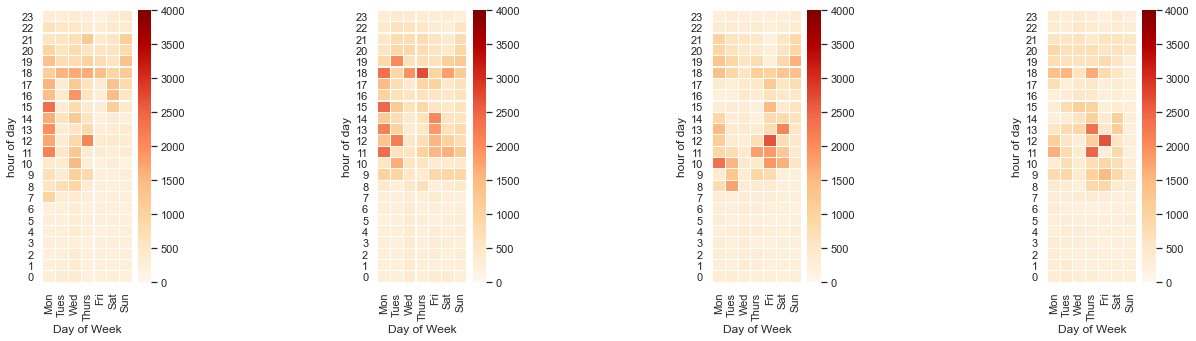

In [217]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,5))
fig.subplots_adjust(wspace=2)
sns.heatmap(grouped_1,vmin=0,vmax=4000,linewidths=.1,cmap='OrRd',yticklabels=True,ax=ax1)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('hour of day')
sns.heatmap(grouped_2,vmin=0,vmax=4000,linewidths=.1,cmap='OrRd',yticklabels=True,ax=ax2)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('hour of day')
ax3= sns.heatmap(grouped_3,vmin=0,vmax=4000,linewidths=.1,cmap='OrRd',yticklabels=True,ax=ax3)
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('hour of day')
ax4 = sns.heatmap(grouped_4,vmin=0,vmax=4000,linewidths=.1,cmap='OrRd',yticklabels=True,ax=ax4)
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('hour of day')
plt.show()

<h2>energy demand in February starts to rise around 7am.</h2>
<h2>the energy demand increase around 10-11am and 18pm</h2>

<br></br>
<h1>4. linear regression</h1>

<h1>Drop the useless categorical values and make complete dataframe for train, test</h1>
<h2>change WeekStatus, Day_Of_Week column into numerical value (dummy variables) for linear regression</h2>
<h2>drop the Appliances column because that is the column that we want to predict</h2>


In [262]:
train=training.drop(['date','Appliances','rv1','rv2','Visibility','WeekStatus','Day_of_week'],axis=1)
train_incomplete=train.join(pd.get_dummies(training.WeekStatus))
train_complete=train_incomplete.join(pd.get_dummies(training.Day_of_week))
train_complete.head()


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,NSM,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,61200,1,0,0,1,0,0,0,0,0
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,61800,1,0,0,1,0,0,0,0,0
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,62400,1,0,0,1,0,0,0,0,0
3,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,63600,1,0,0,1,0,0,0,0,0
4,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,...,64200,1,0,0,1,0,0,0,0,0


In [263]:
train_complete.shape

(14803, 34)

In [264]:
test=testing.drop(['date','Appliances','rv1','rv2','Visibility','WeekStatus','Day_of_week'],axis=1)
test_incomplete=test.join(pd.get_dummies(testing.WeekStatus))
test_complete=test_incomplete.join(pd.get_dummies(testing.Day_of_week))
test_complete.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,NSM,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,17.166667,...,63000,1,0,0,1,0,0,0,0,0
1,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,17.100000,...,64800,1,0,0,1,0,0,0,0,0
2,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,17.100000,...,67200,1,0,0,1,0,0,0,0,0
3,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,17.100000,...,67800,1,0,0,1,0,0,0,0,0
4,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,17.150000,...,70200,1,0,0,1,0,0,0,0,0


In [265]:
test_complete.shape

(4932, 34)

<h2>Getting data and labels for training and testing</h2>

In [266]:
X_train=train_complete
y_train=training.Appliances

In [267]:
X_test=test_complete
y_test=testing.Appliances
# if we put weekstaus for y then we can predict if it is weekend or weekday

In [268]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14803, 34)
(14803,)
(4932, 34)
(4932,)


<h2>linear regression</h2>

In [225]:
#model instantiation 
model1=linear_model.LinearRegression()

#model training
model1.fit(X_train,y_train)

#predicting on training and testing data
y_train_hat=model1.predict(X_train)
y_test_hat=model1.predict(X_test)


In [226]:
print("y = ", model1.coef_, "* x + ", model1.intercept_) 

y =  [ 1.85950783e+00 -5.87710467e+00  1.45321489e+01 -1.77607703e+01
 -1.38191719e+01  2.62103473e+01  6.27133659e+00  6.80292303e-01
 -5.83097085e-01 -1.32924081e+00  5.46887893e-02  7.06267591e+00
  2.94573447e-01  1.29323039e+00 -1.67232976e+00  8.57335665e+00
 -4.05650609e+00 -1.31124708e+01 -3.66407244e-01 -9.43676203e+00
  1.97532827e-01 -7.26129419e-01  1.80527759e+00  3.43054843e+00
  2.88272317e-04 -3.41428884e+00  3.41428884e+00  1.12915222e+01
  5.24066394e+00  9.71447951e+00 -6.30019067e+00 -5.64287936e+00
 -8.73262474e+00 -5.57097088e+00] * x +  -80.33683550930577


In [283]:
sqrt(mean_squared_error(y_test,y_test_hat)), sqrt(mean_squared_error(y_train,y_train_hat))

(93.21603874209941, 93.23321428000587)

<h2>sqrt(mean squared error) of test data set : 93.21603874209941</h2>
<h2>sqrt(mean squared error) of train data set : 93.23321428000587</h2>

<h2>Calculating scores on training and testing sets using standard regression metrics</h2>

In [230]:

#Calculating scores on training sets using standard regression metrics

RMSE_Train=sqrt(mean_squared_error(y_train,y_train_hat))
R2_Train=r2_score(y_train,y_train_hat)
MAE_Train=mean_absolute_error(y_train,y_train_hat)
MAPE_Train=mean_absolute_percentage_error(y_train,y_train_hat)


In [232]:
print('Scores on Training set:')
print('RMSE:  ',RMSE_Train, '  R2:   ',R2_Train,'   MAE: ',MAE_Train,'MAPE:  ',MAPE_Train)

Scores on Training set:
RMSE:   93.23321428000587   R2:    0.17785633861121697    MAE:  53.128328740174084 MAPE:   61.32477920841786


<h2>calculate scores of train data set</h2>

In [233]:
   
#Calculating scores on testing sets using standard regression metrics

RMSE=sqrt(mean_squared_error(y_test,y_test_hat))
R2=r2_score(y_test,y_test_hat)
MAE=mean_absolute_error(y_test,y_test_hat)
MAPE=mean_absolute_percentage_error(y_test,y_test_hat)


In [235]:
print('Scores on Testing set:')
print('RMSE:  ',RMSE, '  R2:   ',R2,'   MAE: ',MAE,'MAPE:  ',MAPE)

Scores on Testing set:
RMSE:   93.21603874209941   R2:    0.158292050824845    MAE:  51.98273483514506 MAPE:   59.97773058185587


<h2>calculate scores of test data set</h2>
<h2>if momdel is improving then the error scores will be go down but r2 score goes up.</h2>

<h1>Residual plot</h1>

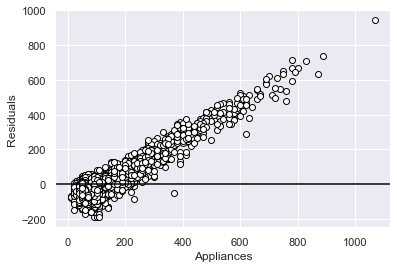

In [240]:
residual=y_test.values-y_test_hat
plt.scatter(y_test,residual, color="white",edgecolor="black")
plt.xlabel('Appliances')
plt.ylabel('Residuals')
plt.axhline(0,color='black')

<h1>Feature Importance using RFE</h1>

In [269]:
from sklearn.feature_selection import RFE

In [270]:
estimator=linear_model.LinearRegression()
rmse_scores=[]
for i in range(1,35):
    selector= RFE(estimator, n_features_to_select=i,step=1)
    selector = selector.fit(X_train,y_train)
    y_test_pred=selector.predict(X_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    print('RMSE score on test set using',i,"features: ",rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 features:  101.26888895164174
RMSE score on test set using 2 features:  99.12399407311727
RMSE score on test set using 3 features:  98.92249989546323
RMSE score on test set using 4 features:  97.97137950937748
RMSE score on test set using 5 features:  97.87877773888789
RMSE score on test set using 6 features:  97.79879832642703
RMSE score on test set using 7 features:  97.54264516067863
RMSE score on test set using 8 features:  97.4383034495254
RMSE score on test set using 9 features:  96.97841033120521
RMSE score on test set using 10 features:  95.04617607469439
RMSE score on test set using 11 features:  95.02193708768031
RMSE score on test set using 12 features:  94.90730063694622
RMSE score on test set using 13 features:  94.6886386020224
RMSE score on test set using 14 features:  94.70687758710379
RMSE score on test set using 15 features:  94.68431856934916
RMSE score on test set using 16 features:  94.69881903708233
RMSE score on test set using 17 fe

<h2>there are 34 features which effect on our linear regression model. this process is to figure out how many features we need to
improve our model</h2>

<h2>based on RMSE test RMSE score on test set using 34 features is having the lowest RMSE score : 93.21603874209941</h2>

In [271]:
rmse_scores

[101.26888895164174,
 99.12399407311727,
 98.92249989546323,
 97.97137950937748,
 97.87877773888789,
 97.79879832642703,
 97.54264516067863,
 97.4383034495254,
 96.97841033120521,
 95.04617607469439,
 95.02193708768031,
 94.90730063694622,
 94.6886386020224,
 94.70687758710379,
 94.68431856934916,
 94.69881903708233,
 94.69881903708233,
 94.69881903708233,
 94.69881903708233,
 94.69255463778536,
 93.3619121919921,
 93.27636375989975,
 93.28874325423499,
 93.30077217688519,
 93.29662987844391,
 93.30656885159118,
 93.31894083520592,
 93.31802587298633,
 93.32086950664971,
 93.33487296014468,
 93.3390194852065,
 93.34604472789057,
 93.3460414106395,
 93.21603874209941]

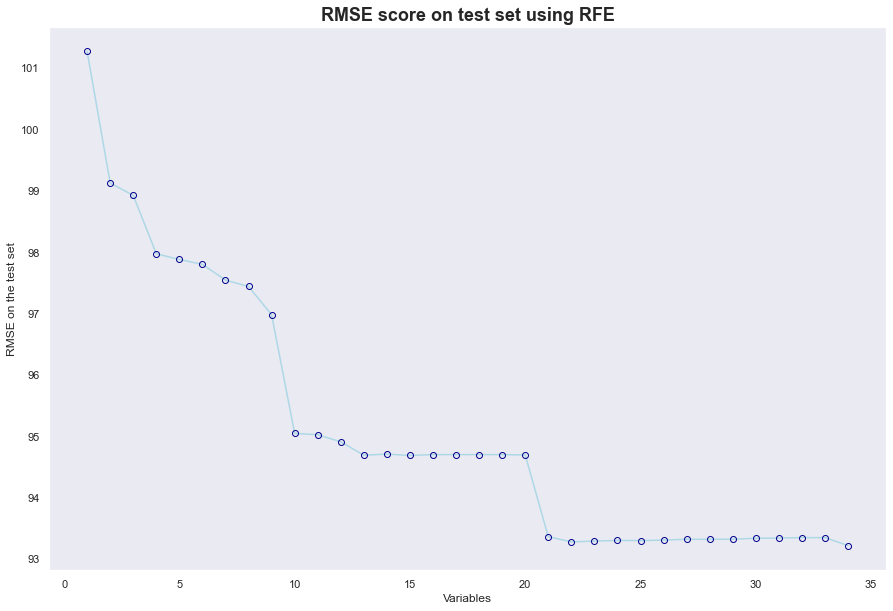

In [272]:
plt.figure(figsize=(15,10))
plt.grid()
plt.xlabel('Variables')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontsize=18,fontweight='bold')
plt.plot(range(1,35),rmse_scores,marker='o',color='lightblue',markeredgewidth=1,markeredgecolor='DarkBlue',markerfacecolor='None')
plt.show()


<h2>prove that RMSE score is the lowest when we use 34 features by visualization.</h2>

<h2>RFECV</h2>

In [273]:
#RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
model=linear_model.LinearRegression()
k=StratifiedKFold(n_splits=10,random_state=42)
rfecv=RFECV(estimator=model,step=1,cv=k,scoring='neg_mean_squared_error')
rfecv=rfecv.fit(X_train,y_train)

In [274]:
print('Optimal number of features: ',rfecv.n_features_)
print('Best features : ',X_train.columns[rfecv.support_])

Optimal number of features:  23
Best features :  Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'RH_7', 'T8',
       'RH_8', 'T9', 'T_out', 'Windspeed', 'Weekday', 'Weekend', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


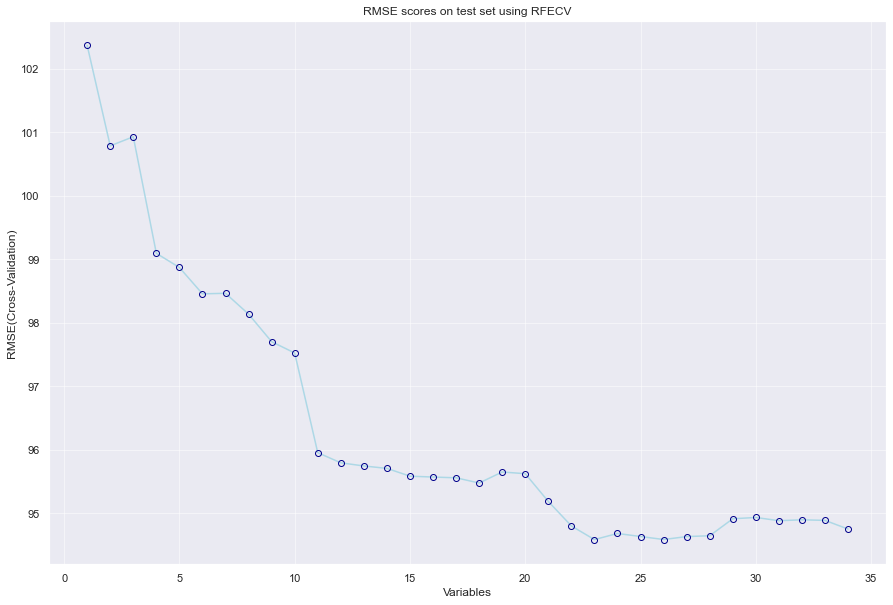

In [286]:
plt.figure(figsize=(15,10))
plt.xlabel('Variables')
plt.ylabel('RMSE(Cross-Validation)')
plt.title('RMSE scores on test set using RFECV')
rmse_cv_scores=np.sqrt(-rfecv.grid_scores_)
p=plt.plot(range(1,len(rfecv.grid_scores_)+1),rmse_cv_scores,marker='o',color='lightblue',markeredgewidth=1,markeredgecolor='DarkBlue',markerfacecolor='None')
plt.grid(alpha=0.5)
plt.show()

<h2>RMSE(Cross-Validation) shows that Optimal number of features is 23 with
 Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'RH_7', 'T8',
       'RH_8', 'T9', 'T_out', 'Windspeed', 'Weekday', 'Weekend', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'])</h2>